# Part 1: Data Preparation and Exploration
1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

In [1]:
import pandas as pd
df = pd.read_csv("exchange_rate.csv")
df.shape

(7588, 2)

In [2]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [4]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [5]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [6]:
# Converting the DateTime format to Date Format

df['date'] = pd.to_datetime(df['date'], errors = 'coerce').dt.date

In [7]:
df.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-02-01,0.7818
2,1990-03-01,0.7867
3,1990-04-01,0.7860
4,1990-05-01,0.7849


# Visualizations

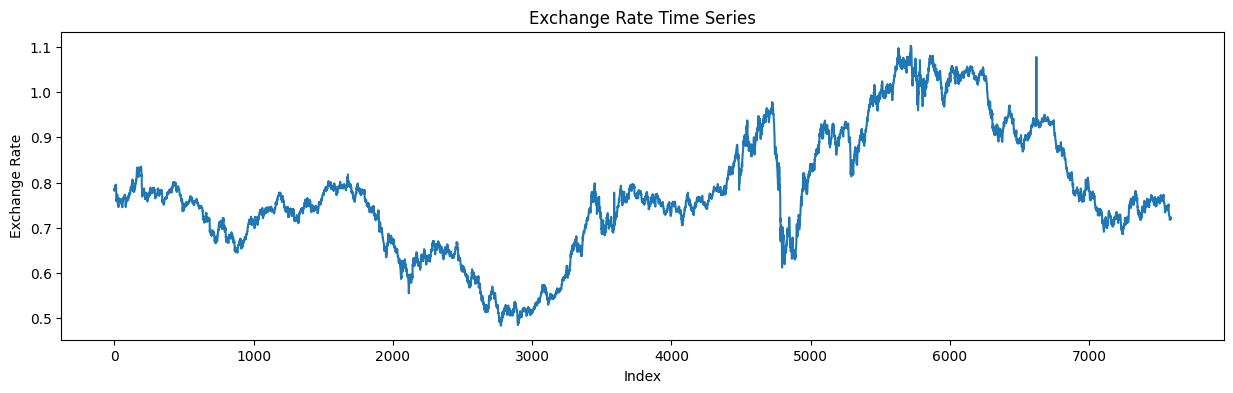

In [8]:
# Constructing Line Plot for the Ex_rate

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,4))
sns.lineplot(df, x = df.index, y = 'Ex_rate')
plt.title('Exchange Rate Time Series')
plt.xlabel('Index')
plt.ylabel('Exchange Rate')
plt.show()

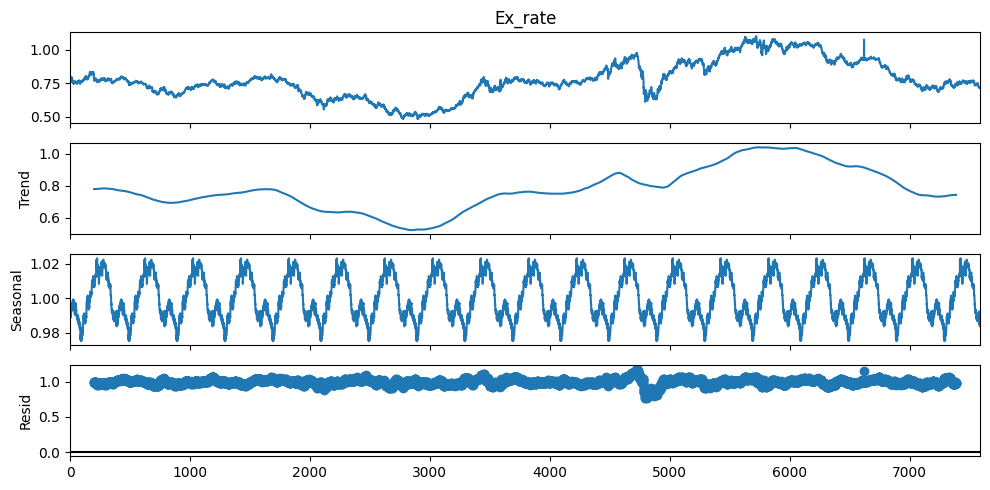

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 10,5
decompose_ts_add = seasonal_decompose(df.Ex_rate, model = 'multiplicative', period = 400)
decompose_ts_add.plot()
plt.show()

In [10]:
df['t'] = df.index + 1
df.head()

,date,Ex_rate,t
0,1990-01-01,0.7855,1
1,1990-02-01,0.7818,2
2,1990-03-01,0.7867,3
3,1990-04-01,0.7860,4
4,1990-05-01,0.7849,5


In [11]:
import numpy as np
df['log_ex_rate'] = np.log(df['Ex_rate'])
df.head()

,date,Ex_rate,t,log_ex_rate
0,1990-01-01,0.7855,1,-0.241435
1,1990-02-01,0.7818,2,-0.246156
2,1990-03-01,0.7867,3,-0.239908
3,1990-04-01,0.7860,4,-0.240798
4,1990-05-01,0.7849,5,-0.242199


In [12]:
df['t-square'] = df['t'] ** 2
df.head()

,date,Ex_rate,t,log_ex_rate,t-square
0,1990-01-01,0.7855,1,-0.241435,1
1,1990-02-01,0.7818,2,-0.246156,4
2,1990-03-01,0.7867,3,-0.239908,9
3,1990-04-01,0.7860,4,-0.240798,16
4,1990-05-01,0.7849,5,-0.242199,25


In [13]:
# extracting month from the date column

df['month'] = pd.to_datetime(df['date']).dt.strftime('%b')
df.head()

,date,Ex_rate,t,log_ex_rate,t-square,month
0,1990-01-01,0.7855,1,-0.241435,1,Jan
1,1990-02-01,0.7818,2,-0.246156,4,Feb
2,1990-03-01,0.7867,3,-0.239908,9,Mar
3,1990-04-01,0.7860,4,-0.240798,16,Apr
4,1990-05-01,0.7849,5,-0.242199,25,May


In [14]:
df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df.head()

,date,Ex_rate,t,log_ex_rate,t-square,month,year
0,1990-01-01,0.7855,1,-0.241435,1,Jan,1990
1,1990-02-01,0.7818,2,-0.246156,4,Feb,1990
2,1990-03-01,0.7867,3,-0.239908,9,Mar,1990
3,1990-04-01,0.7860,4,-0.240798,16,Apr,1990
4,1990-05-01,0.7849,5,-0.242199,25,May,1990


In [15]:
list(df['month'].unique())

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [16]:
# One Hot Encoding

df_encoded = pd.get_dummies(df['month'], prefix = '', dtype = int).sort_index(axis = 1)
df_encoded

,_Apr,_Aug,_Dec,_Feb,_Jan,_Jul,_Jun,_Mar,_May,_Nov,_Oct,_Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7583,0,0,0,0,0,0,1,0,0,0,0,0
7584,0,0,0,0,0,1,0,0,0,0,0,0
7585,0,1,0,0,0,0,0,0,0,0,0,0
7586,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
df_final = pd.concat([df, df_encoded], axis = 1)
df_final.head()

,date,Ex_rate,t,log_ex_rate,t-square,month,year,_Apr,_Aug,_Dec,_Feb,_Jan,_Jul,_Jun,_Mar,_May,_Nov,_Oct,_Sep
0,1990-01-01,0.7855,1,-0.241435,1,Jan,1990,0,0,0,0,1,0,0,0,0,0,0,0
1,1990-02-01,0.7818,2,-0.246156,4,Feb,1990,0,0,0,1,0,0,0,0,0,0,0,0
2,1990-03-01,0.7867,3,-0.239908,9,Mar,1990,0,0,0,0,0,0,0,1,0,0,0,0
3,1990-04-01,0.7860,4,-0.240798,16,Apr,1990,1,0,0,0,0,0,0,0,0,0,0,0
4,1990-05-01,0.7849,5,-0.242199,25,May,1990,0,0,0,0,0,0,0,0,1,0,0,0


<Axes: >

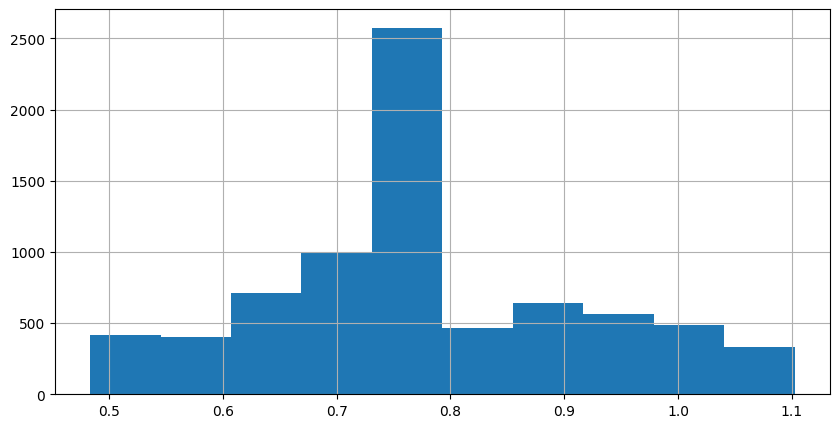

In [18]:
# Constructing Histogram for Ex_rate

df['Ex_rate'].hist()

In [19]:
df['Ex_rate'].skew()

0.2611267376737365

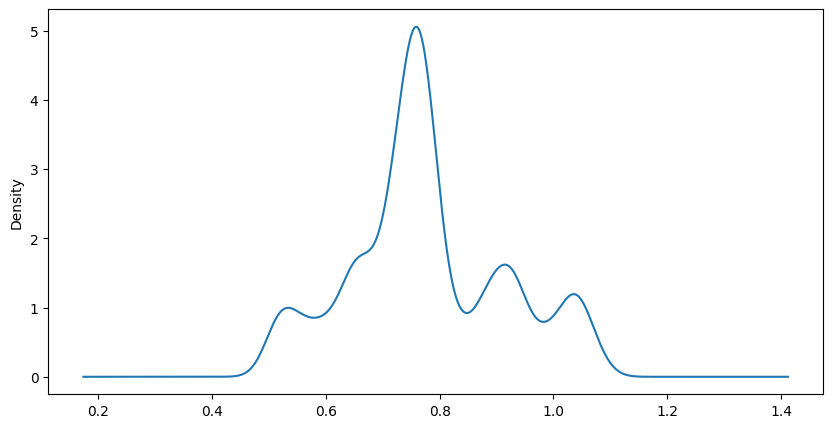

In [20]:
df['Ex_rate'].plot(kind = 'kde')
plt.show()

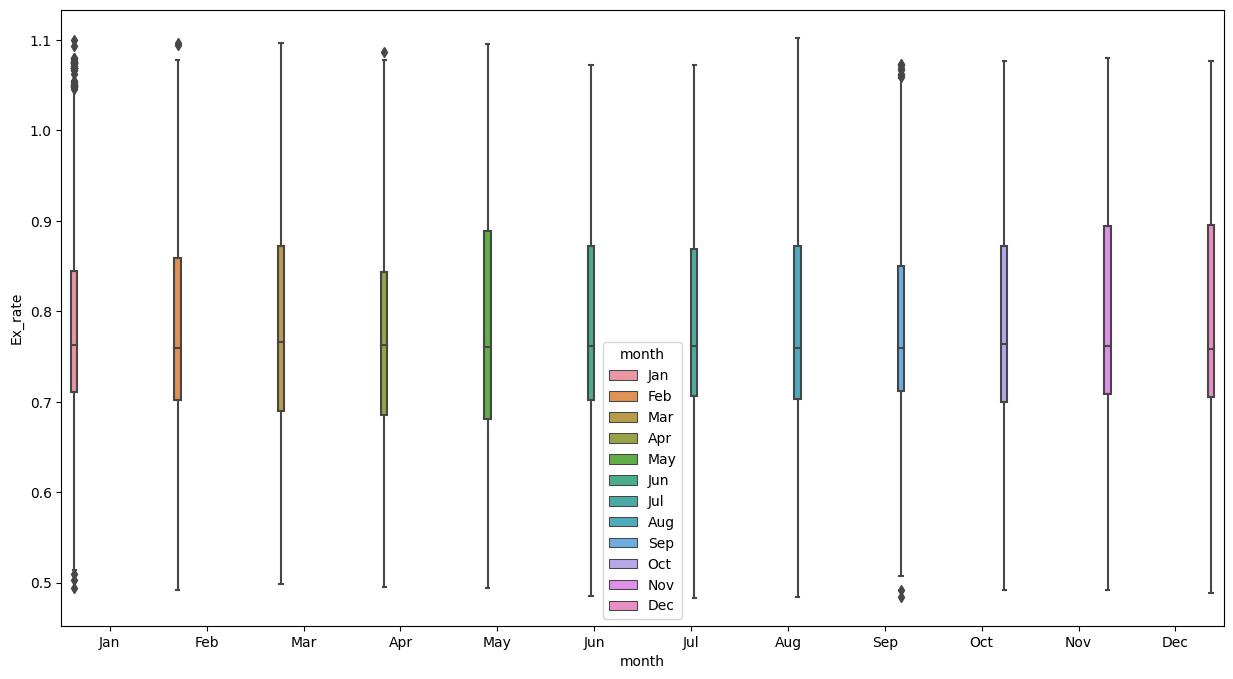

In [21]:
# Constructing Box Plot of Ex_rate column for monthly-wise

plt.figure(figsize = (15, 8))
sns.boxplot(data = df_final, x = 'month', y = 'Ex_rate', hue = 'month')
plt.show()

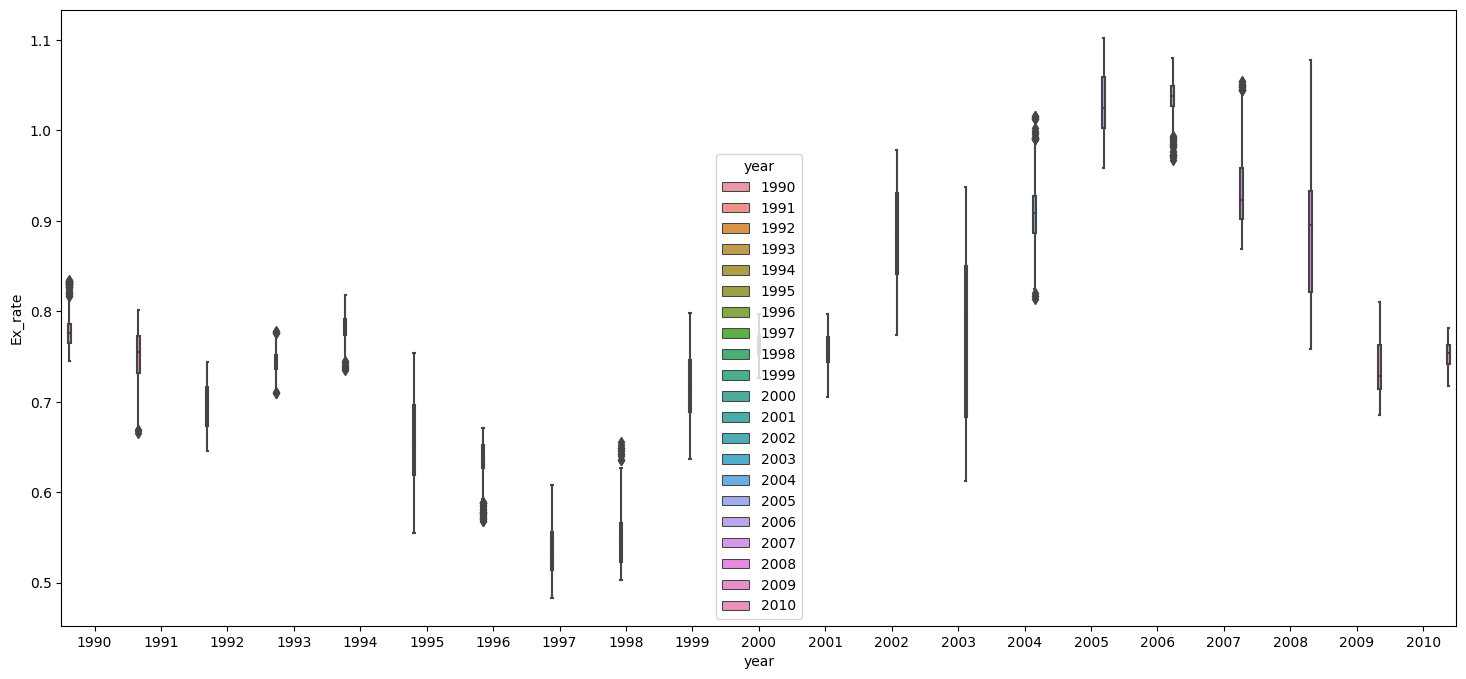

In [22]:
# Constructing Box Plot of Ex_rate column Year_wise

plt.figure(figsize = (18,8))
sns.boxplot(data = df_final, x = 'year', y = 'Ex_rate', hue = 'year')
plt.show()

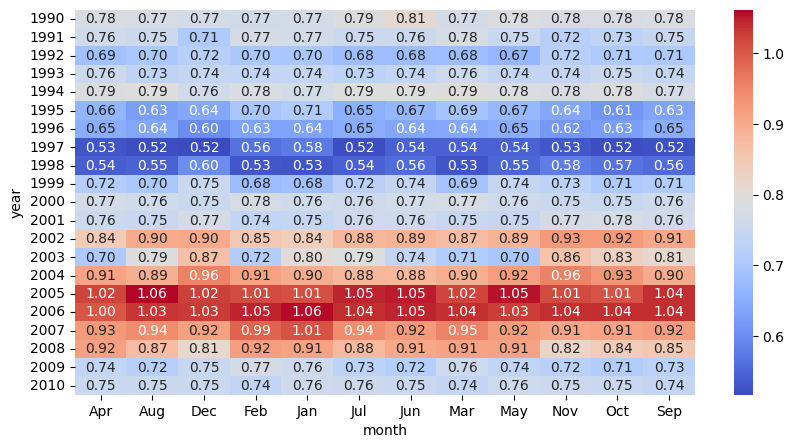

In [23]:
# Heat map

heat_map = pd.pivot_table(data = df_final, index = 'year', values = 'Ex_rate', columns = 'month')
sns.heatmap(data = heat_map, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

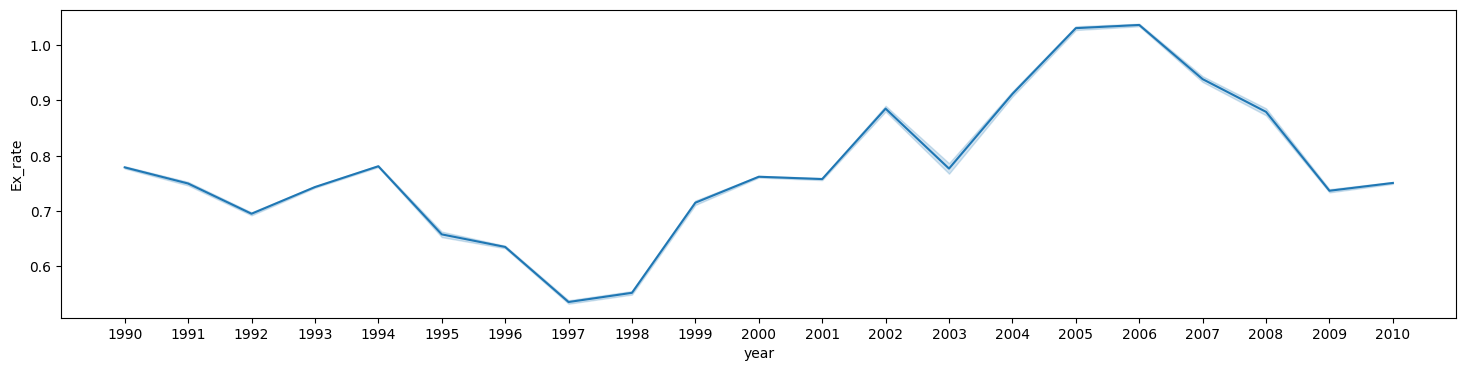

In [24]:
# Constructing Year-wise Line Plot

plt.figure(figsize = (18, 4))
sns.lineplot(data = df_final, x = 'year', y = 'Ex_rate')
plt.show()

In [25]:
df['Ex_rate_diff'] = df['Ex_rate'].diff()
df['Ex_rate_diff']

0            NaN
1      -0.003700
2       0.004900
3      -0.000700
4      -0.001100
          ...   
7583   -0.000207
7584    0.003345
7585    0.001358
7586   -0.002372
7587    0.000000
Name: Ex_rate_diff, Length: 7588, dtype: float64

<Axes: >

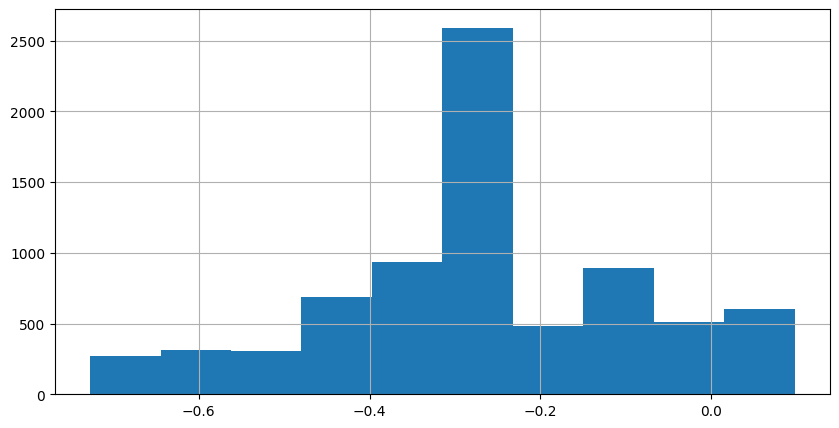

In [26]:
df['log_ex_rate'].hist()

In [27]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Ex_rate_diff'].dropna())
print('ADF Statstic:', result[0])
print('P-value:', result[1])

ADF Statstic: -99.3934312011863
P-value: 0.0


# Part 2: Model Building - ARIMA
1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

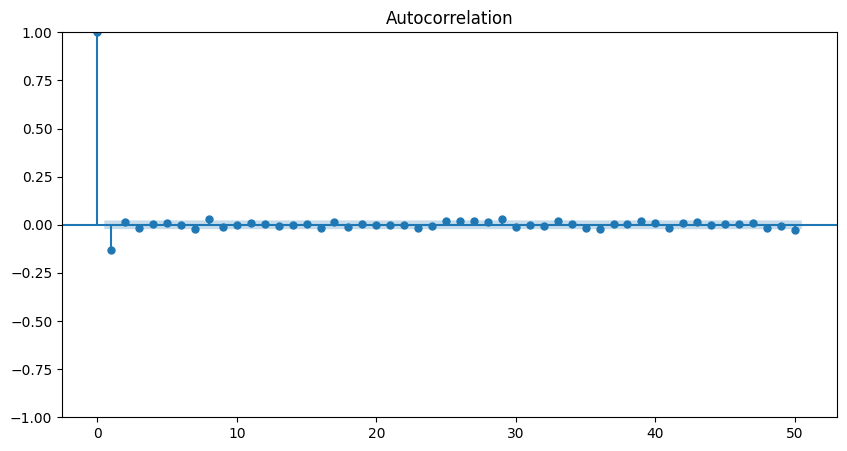

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Ex_rate_diff'].dropna(), lags = 50)
plt.show()

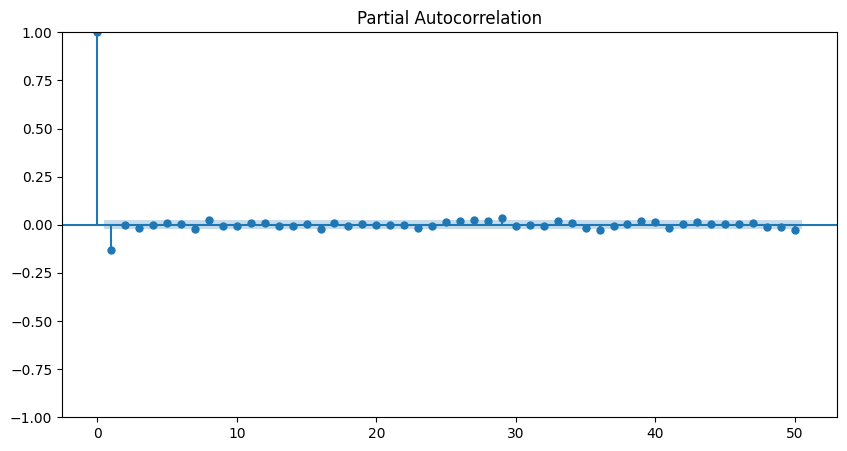

In [29]:
plot_pacf(df['Ex_rate_diff'].dropna(), lags = 50)
plt.show()

# Part 3: Model Building - Exponential Smoothing
1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

# Holt-Winter's Exponential Smoothing

In [30]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
smoothing_levels = np.linspace(0.1, 0.9, 9)
smoothing_slopes = np.linspace(0.01, 0.1, 10)
best_params = None
best_rmse = float('inf')

In [32]:
for aplha in smoothing_levels:
    for beta in smoothing_slopes:
        model = Holt(df['Ex_rate'], exponential = True, damped = True)
        model_fit = model.fit(smoothing_level = aplha, smoothing_slope = beta)
        predictions = model_fit.predict(start = 0, end = len(df) - 1)
        rmse = mean_squared_error(df['Ex_rate'], predictions, squared = False)
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = (aplha, beta)

C:\Users\mulag\AppData\Local\Temp\ipykernel_10080\2502590145.py:3: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(df['Ex_rate'], exponential = True, damped = True)
C:\Users\mulag\AppData\Local\Temp\ipykernel_10080\2502590145.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level = aplha, smoothing_slope = beta)
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mulag\AppData\Local\Temp\ipykernel_10080\2502590145.py:3: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(df['Ex_rate'], exponential = True, damped = True)
C:\Users\mulag\AppData\Local\Temp\ipykernel_10080\2502590145.py:4: FutureWarning:

# Model Fitting and Forecasting

In [33]:
model_holt = Holt(df['Ex_rate'], exponential = True, damped = True)
fitted_holt = model_holt.fit(smoothing_level = best_params[0], smoothing_slope = best_params[1])
predictions_holt = fitted_holt.predict(start = 0, end = len(df) - 1)
predictions_holt

C:\Users\mulag\AppData\Local\Temp\ipykernel_10080\2785399729.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model_holt = Holt(df['Ex_rate'], exponential = True, damped = True)
C:\Users\mulag\AppData\Local\Temp\ipykernel_10080\2785399729.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_holt = model_holt.fit(smoothing_level = best_params[0], smoothing_slope = best_params[1])


0       0.854974
1       0.870311
2       0.865743
3       0.861924
4       0.854784
          ...   
7583    0.718809
7584    0.718497
7585    0.720775
7586    0.722430
7587    0.721259
Length: 7588, dtype: float64

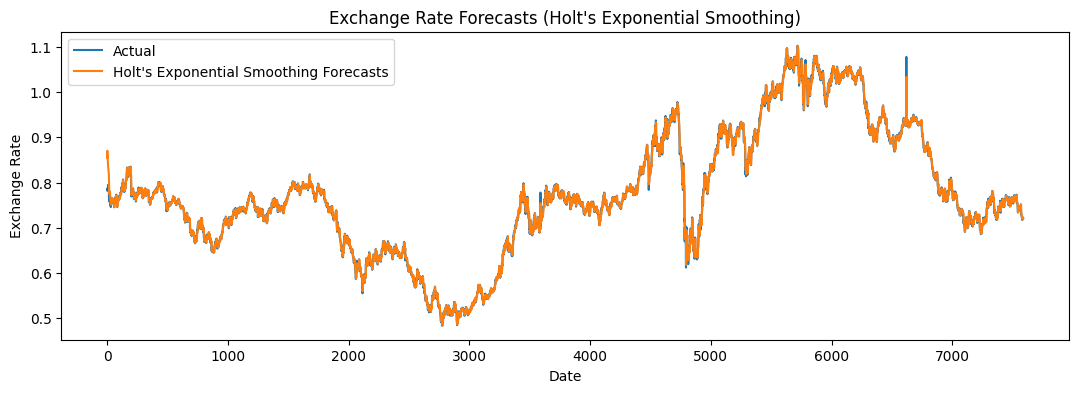

In [34]:
# Visualizing the forecasts

plt.figure(figsize = (13, 4))
plt.plot(df['Ex_rate'], label = 'Actual')
plt.plot(predictions_holt, label = 'Holt\'s Exponential Smoothing Forecasts')
plt.title('Exchange Rate Forecasts (Holt\'s Exponential Smoothing)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [35]:
df_final['Ex_rate'] = fitted_holt.fittedvalues
df_final['Ex_rate']

0       0.782144
1       0.781474
2       0.778975
3       0.781950
4       0.782603
          ...   
7583    0.718809
7584    0.718497
7585    0.720775
7586    0.722430
7587    0.721259
Name: Ex_rate, Length: 7588, dtype: float64

In [36]:
df_final

,date,Ex_rate,t,log_ex_rate,t-square,month,year,_Apr,_Aug,_Dec,_Feb,_Jan,_Jul,_Jun,_Mar,_May,_Nov,_Oct,_Sep
0,1990-01-01,0.782144,1,-0.241435,1,Jan,1990,0,0,0,0,1,0,0,0,0,0,0,0
1,1990-02-01,0.781474,2,-0.246156,4,Feb,1990,0,0,0,1,0,0,0,0,0,0,0,0
2,1990-03-01,0.778975,3,-0.239908,9,Mar,1990,0,0,0,0,0,0,0,1,0,0,0,0
3,1990-04-01,0.781950,4,-0.240798,16,Apr,1990,1,0,0,0,0,0,0,0,0,0,0,0
4,1990-05-01,0.782603,5,-0.242199,25,May,1990,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,2010-06-10,0.718809,7584,-0.330598,57517056,Jun,2010,0,0,0,0,0,0,1,0,0,0,0,0
7584,2010-07-10,0.718497,7585,-0.325953,57532225,Jul,2010,0,0,0,0,0,1,0,0,0,0,0,0
7585,2010-08-10,0.720775,7586,-0.324074,57547396,Aug,2010,0,1,0,0,0,0,0,0,0,0,0,0
7586,2010-09-10,0.722430,7587,-0.327359,57562569,Sep,2010,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
mae_holt = mean_absolute_error(df['Ex_rate'], predictions_holt)
rmse_holt = mean_squared_error(df['Ex_rate'], predictions_holt, squared = False)
mape_holt = np.mean(np.abs((df['Ex_rate'] - predictions_holt) / df['Ex_rate'])) * 100

C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
print('\nHolt\'s Exponential Smoothing')
print('MAE:', mae_holt)
print('RMSE:', rmse_holt)
print('MAPE:', mape_holt)


Holt's Exponential Smoothing
MAE: 0.003967482238028915
RMSE: 0.006596592858922954
MAPE: 0.5173798966794805


In [39]:
# Data Partition

train = df_final[df_final['year'] <= '2009']
test = df_final[df_final['year'] > '2009']

# ARIMA Model

In [40]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(predictions_holt, order = (1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               30676.033
Date:                Thu, 21 Nov 2024   AIC                         -61346.067
Time:                        10:40:11   BIC                         -61325.264
Sample:                             0   HQIC                        -61338.928
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3490      0.030     11.601      0.000       0.290       0.408
ma.L1         -0.1770      0.030     -5.860      0.000      -0.236      -0.118
sigma2      1.798e-05   4.97e-08    361.631      0.000    1.79e-05    1.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2849162.32
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.90   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        97.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
model = ARIMA(predictions_holt, order = (2,1,2))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:                 ARIMA(2, 1, 2)   Log Likelihood               30677.635
Date:                Thu, 21 Nov 2024   AIC                         -61345.271
Time:                        10:40:16   BIC                         -61310.600
Sample:                             0   HQIC                        -61333.372
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0463      0.408     -0.113      0.910      -0.847       0.754
ar.L2          0.0397      0.156      0.254      0.799      -0.267       0.346
ma.L1          0.2177      0.408      0.533      0.594      -0.583       1.018
ma.L2          0.0351      0.092      0.382      0.702      -0.145       0.215
sigma2      1.797e-05   5.07e-08    354.726      0.000    1.79e-05    1.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2841962.49
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.90   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        97.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
# Hyper Parameter Tuning

import itertools

In [43]:
p = [0, 1, 2, 4, 6]
d = range(0, 3)
q = range(0, 3)
optimal_params = None
min_aic = float('inf')

In [44]:
pdq = list(itertools.product(p, d, q))

In [45]:
for param in pdq:
    try:
        model = ARIMA(predictions_holt, order = param)
        results = model.fit()
        if results.aic < min_aic:
            optimal_params = param
        min_aic = min(min_aic, results.aic)

        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue
print(f'Best params: {optimal_params}, min_aic: {min_aic}')

ARIMA(0, 0, 0) - AIC:-8671.912790160486


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 1) - AIC:-18894.03996847094
ARIMA(0, 0, 2) - AIC:-27735.587413684698


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0) - AIC:-61099.80828813822
ARIMA(0, 1, 1) - AIC:-61316.37910446135
ARIMA(0, 1, 2) - AIC:-61349.27292452022


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0) - AIC:-57319.53739771704
ARIMA(0, 2, 1) - AIC:-60122.104072650785
ARIMA(0, 2, 2) - AIC:-60657.74447810266
ARIMA(1, 0, 0) - AIC:-61099.6126770281


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1) - AIC:-61316.83810400103
ARIMA(1, 0, 2) - AIC:-61349.9982160518
ARIMA(1, 1, 0) - AIC:-61340.13465248529
ARIMA(1, 1, 1) - AIC:-61346.066911173184


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2) - AIC:-61347.205018115405


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0) - AIC:-58881.58158608482
ARIMA(1, 2, 1) - AIC:-60361.37217844369
ARIMA(1, 2, 2) - AIC:-60551.78448309803
ARIMA(2, 0, 0) - AIC:-61340.77484630934


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1) - AIC:-61346.60849487756
ARIMA(2, 0, 2) - AIC:-61347.966120916695


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0) - AIC:-61347.51202067577


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1) - AIC:-61347.089275164086
ARIMA(2, 1, 2) - AIC:-61345.2708508458
ARIMA(2, 2, 0) - AIC:-59437.91477104723


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1) - AIC:-61313.820455240595
ARIMA(2, 2, 2) - AIC:-60774.92390753897
ARIMA(4, 0, 0) - AIC:-61347.85066892911


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 1) - AIC:-61343.967314243


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 2) - AIC:-61290.47364541682
ARIMA(4, 1, 0) - AIC:-61345.43148171105


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 1) - AIC:-61343.313994301585


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2) - AIC:-61341.13575583299
ARIMA(4, 2, 0) - AIC:-60107.708937756


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 1) - AIC:-61150.57066423386
ARIMA(4, 2, 2) - AIC:-60736.71178112943
ARIMA(6, 0, 0) - AIC:-61345.07930570314
ARIMA(6, 0, 1) - AIC:-61342.65553995207


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 2) - AIC:-61341.10005049115
ARIMA(6, 1, 0) - AIC:-61342.383660797634
ARIMA(6, 1, 1) - AIC:-61340.25276212606


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 1, 2) - AIC:-61338.40055952004
ARIMA(6, 2, 0) - AIC:-60374.73949890532
ARIMA(6, 2, 1) - AIC:-60304.67072458568
ARIMA(6, 2, 2) - AIC:-60689.666660941344
Best params: (1, 0, 2), min_aic: -61349.9982160518


In [46]:
# Best model based on Grid Search

model = ARIMA(predictions_holt, order = optimal_params)
ARIMA_fitted = model.fit()
ARIMA_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:                 ARIMA(1, 0, 2)   Log Likelihood               30679.999
Date:                Thu, 21 Nov 2024   AIC                         -61349.998
Time:                        10:42:25   BIC                         -61315.327
Sample:                             0   HQIC                        -61338.099
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7771      0.081      9.617      0.000       0.619       0.935
ar.L1          0.9993      0.000   2260.633      0.000       0.998       1.000
ma.L1          0.1720      0.002     73.585      0.000       0.167       0.177
ma.L2          0.0675      0.006     11.338      0.000       0.056       0.079
sigma2      1.796e-05   5.12e-08    350.696      0.000    1.79e-05    1.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2848657.66
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.90   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        97.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

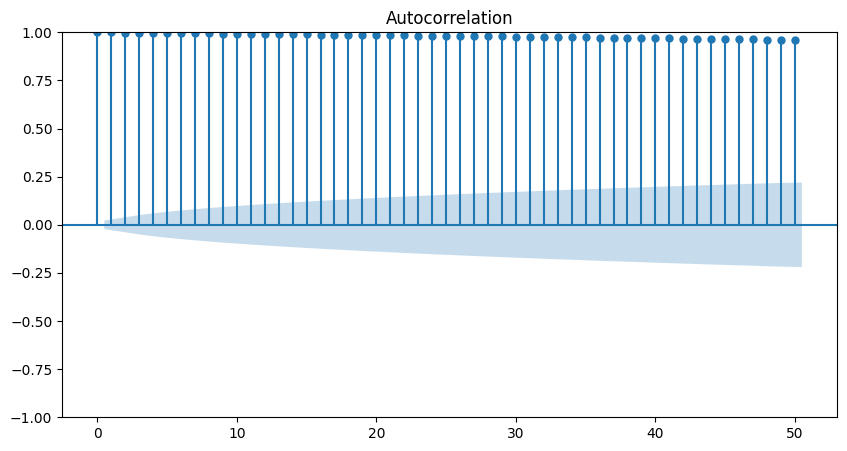

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(predictions_holt, lags = 50)
plt.show()

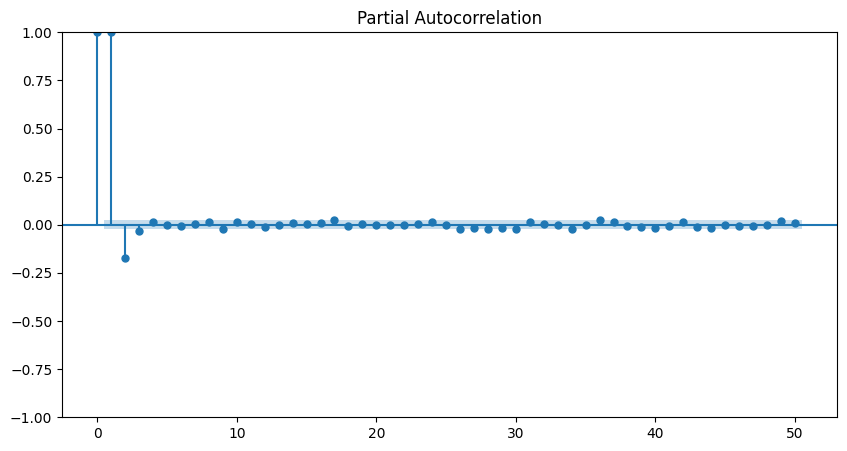

In [48]:
plot_pacf(predictions_holt, lags = 50)
plt.show()

In [49]:
forecast = ARIMA_fitted.predict(start = len(train), end = len(df_final) - 1)
forecast

7305    0.761391
7306    0.754943
7307    0.752401
7308    0.751632
7309    0.751034
          ...   
7583    0.719500
7584    0.718758
7585    0.718450
7586    0.721199
7587    0.722839
Name: predicted_mean, Length: 283, dtype: float64

# Part 4: Evaluation and Comparison
1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

In [50]:
mae_arima = mean_absolute_error(test['Ex_rate'], forecast)
rmse_arima = mean_squared_error(test['Ex_rate'], forecast, squared = False)
mape_arima = np.mean(np.abs((test['Ex_rate'] - forecast) / test['Ex_rate'])) * 100

C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [52]:
print('ARIMA Model:')
print('MAE:', mae_arima)
print('RMSE:', rmse_arima)
print('MAPE:', mape_arima)

ARIMA Model:
MAE: 0.0021406859841395986
RMSE: 0.0030706029123585216
MAPE: 0.2851381148205001


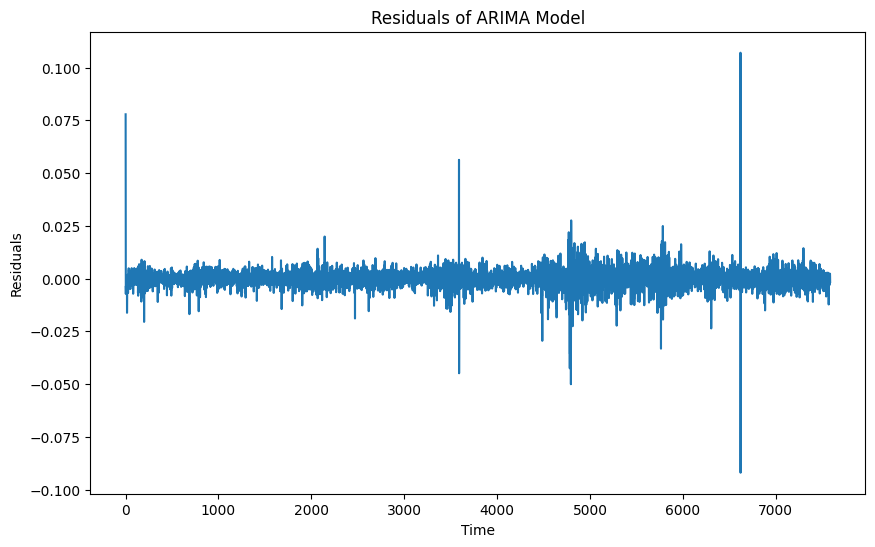

In [53]:
residuals = ARIMA_fitted.resid
plt.figure(figsize = (10,6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

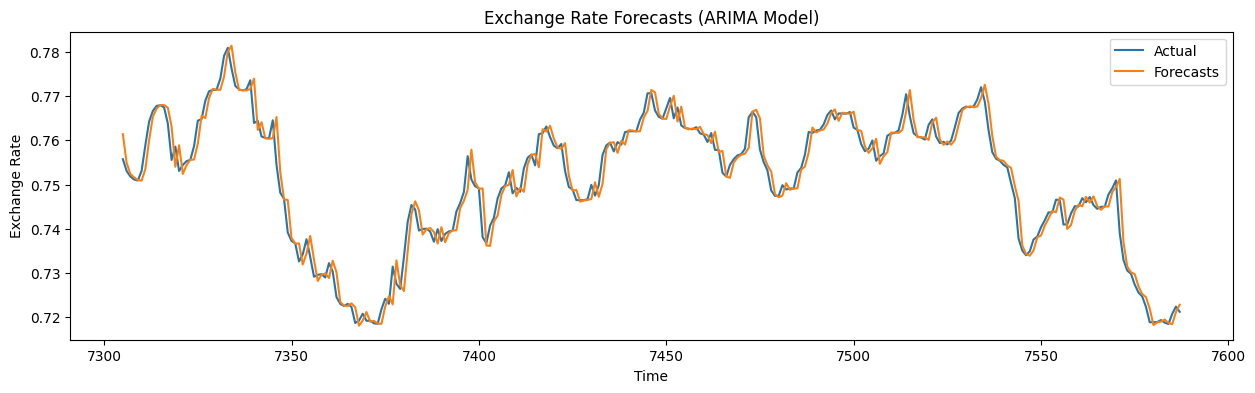

In [54]:
plt.figure(figsize = (15, 4))
plt.plot(test.Ex_rate, label = 'Actual')
plt.plot(forecast, label = 'Forecasts')
plt.title('Exchange Rate Forecasts (ARIMA Model)')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

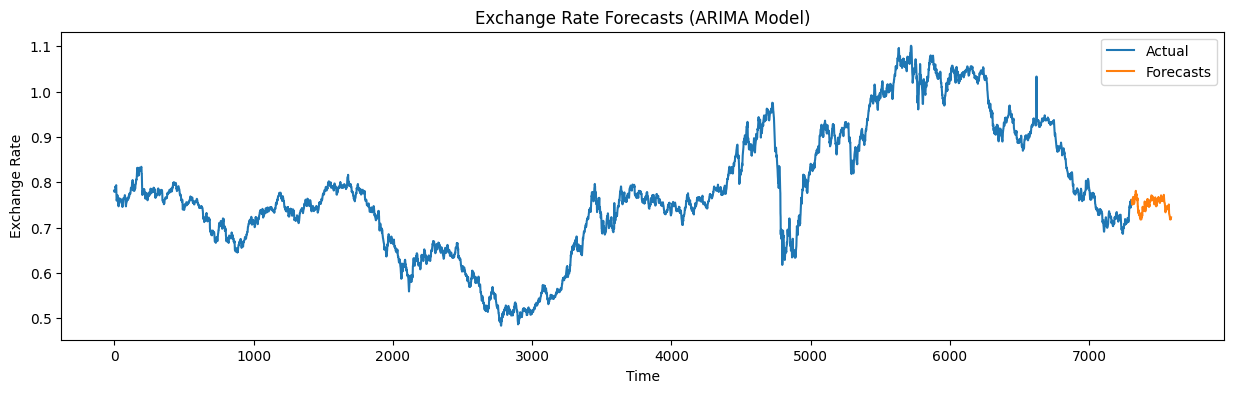

In [55]:
plt.figure(figsize = (15,4))
plt.plot(train.Ex_rate, label = 'Actual')
plt.plot(forecast, label = 'Forecasts')
plt.title('Exchange Rate Forecasts (ARIMA Model)')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

1. Forecasting Performance:

- The orange line represents the ARIMA model's forecast, while the blue line represents the actual exchange rate data.
- The ARIMA model appears to follow the overall trend and level of the data, indicating that it has captured the underlying pattern in the time series.

2. Model Strengths:

- The forecasts align reasonably well with the actual values in the short term.
- This suggests that the ARIMA model is effective in handling the observed fluctuations and mean-reverting behavior of the exchange rate.